# Name- AMLAN DAS
# SIC- 20BCSC67

# Terms Used in the dataset

In [1]:
# Age : Age of the patient

# Sex : Sex of the patient

# exang: exercise induced angina (1 = yes; 0 = no)
# Angina: type of chest pain caused by reduced blood flow to the heart. 

# ca: number of major vessels (0-3)

# cp : Chest Pain type chest pain type

# Value 1: typical angina
# Value 2: atypical angina
# Value 3: non-anginal pain
# Value 4: asymptomatic

# trtbps : resting blood pressure (in mm Hg)

# chol : cholestoral in mg/dl fetched via BMI sensor

# fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

# rest_ecg : resting electrocardiographic results

# Value 0: normal
# Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

# thalach : maximum heart rate achieved

# target : 0= less chance of heart attack 1= more chance of heart attack

# Step 1: Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Importing Dataset

In [4]:
dataset = pd.read_csv('heart.csv')

In [5]:
dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data Processing

In [12]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


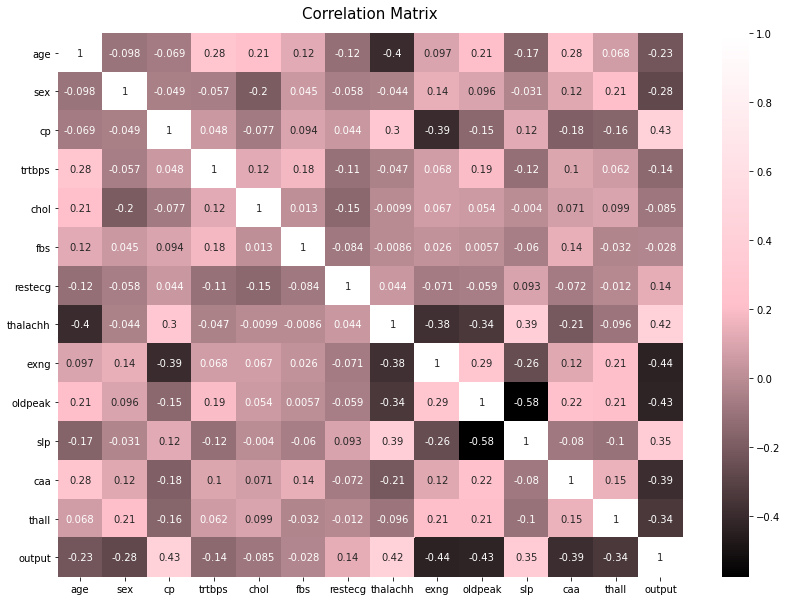

In [7]:
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["black", "pink", "w"], N=256) 
plt.figure(figsize = (14,10))
sns.heatmap(dataset.corr(), cmap = cmap, annot = True)
plt.title('Correlation Matrix',pad = 15, fontsize = 15)
plt.show()


#### From the Heatmap we find that cp(Chest Pain type) and thalach(maximum heart rate achieved) positively correlated.¶
#### Also exng(exercise induced angina) and oldpeak(depression induced by exercise relative to rest) are negatively correlated. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


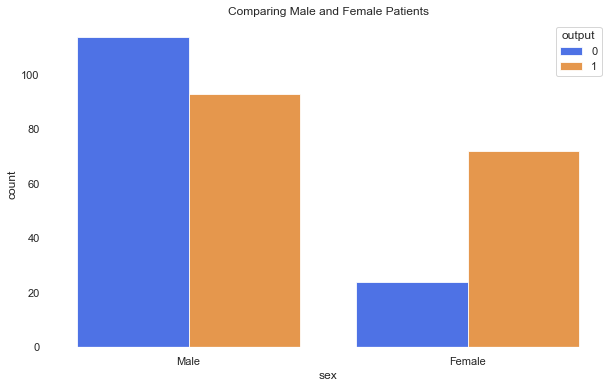

In [10]:
plt.figure(figsize = (10,6))
sns.set(rc = {'axes.facecolor': 'w', 'axes.grid': False,})

sex_data = dataset.sex.map({1: 'Male', 0: 'Female'})
sns.countplot(sex_data, hue = dataset.output, palette = 'bright', alpha = 0.8)
plt.title('Comparing Male and Female Patients')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


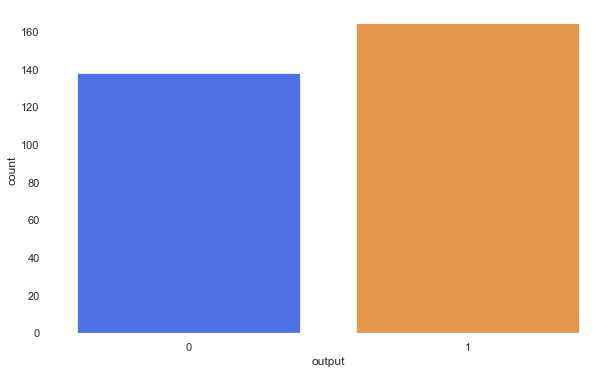

In [14]:
plt.figure(figsize = (10,6))
sns.set(rc = {'axes.facecolor': 'w', 'axes.grid': False,})
sns.countplot(dataset.output ,palette = 'bright', alpha = 0.8)
plt.show()

# Distribution of Age:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


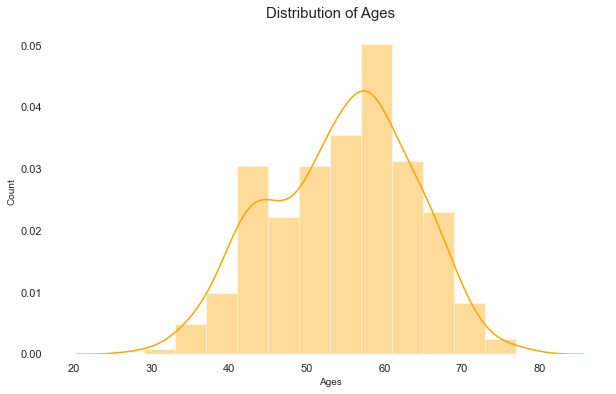

In [19]:
sns.set(rc = {'axes.facecolor': 'white', 'axes.grid': False,})
plt.figure(figsize = [10,6])

sns.distplot(dataset['age'], color='orange')
plt.title('Distribution of Ages', fontsize=15, pad = 10)
plt.xlabel('Ages', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

#### From this plot we conclude that maximum heart attack patients are from the age of 55 to 65 (approximately).

# Distribution for Blood Pressure

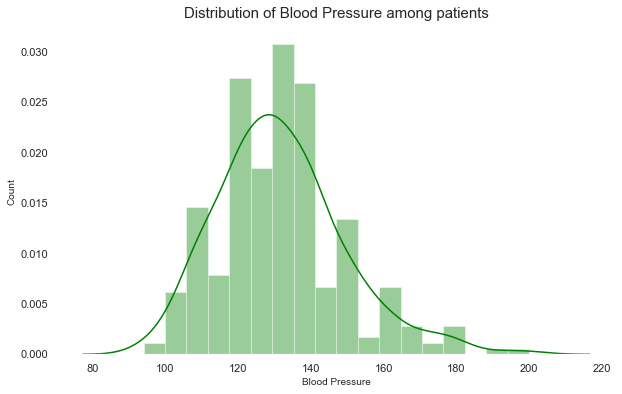

In [22]:
# Blood Pressure
sns.set(rc = {'axes.facecolor': 'white', 'axes.grid': False,})
plt.figure(figsize = [10,6])

sns.distplot(dataset['trtbps'], color='green')
plt.title('Distribution of Blood Pressure among patients', fontsize=15, pad = 10)
plt.xlabel('Blood Pressure', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()


# Distribution of cholestrol

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


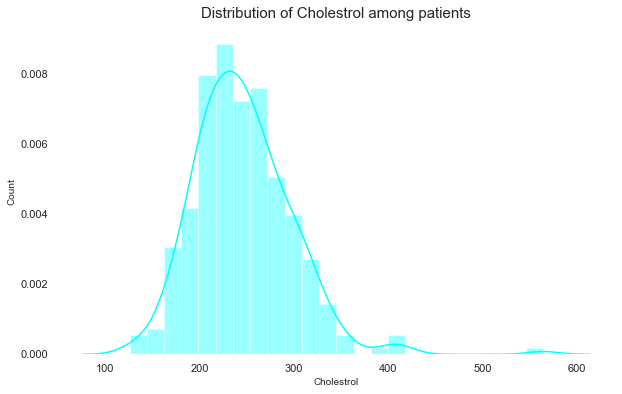

In [23]:
# Cholesterol rate
plt.figure(figsize = [10,6])

sns.distplot(dataset['chol'], color='cyan')
plt.title('Distribution of Cholestrol among patients', fontsize=15, pad = 10)
plt.xlabel('Cholestrol', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

In [24]:
features = ['cp','fbs','restecg','exng','slp','caa','thall']

In [25]:
list(enumerate(features))

[(0, 'cp'),
 (1, 'fbs'),
 (2, 'restecg'),
 (3, 'exng'),
 (4, 'slp'),
 (5, 'caa'),
 (6, 'thall')]

In [26]:
dataset['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

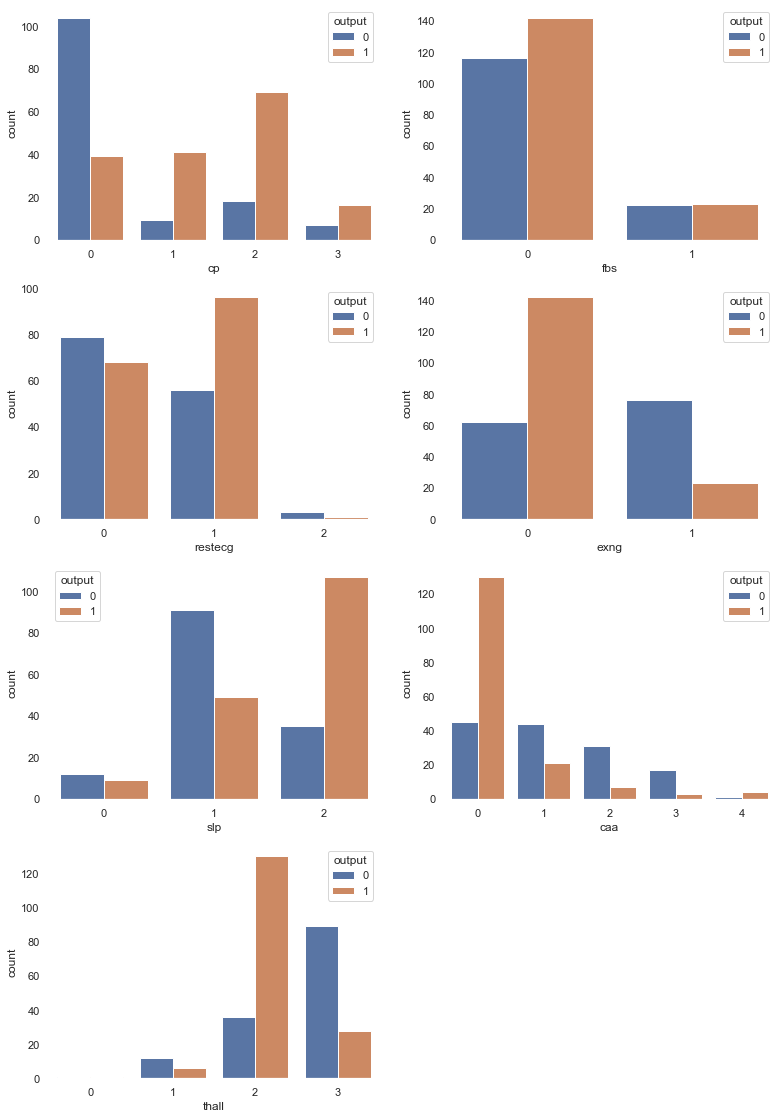

In [28]:
plt.figure(figsize = (13,30))
sns.set(rc = {'axes.facecolor': 'w', 'axes.grid': False,})

for i in enumerate(features):
    plt.subplot(6, 2, i[0]+1)
    sns.countplot(i[1], hue = 'output',data = dataset)
plt.show()

#### the people with maximum heart rate have more risk of heart attack - (thall) - maximum heart rate achieved

In [29]:
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Step 3: Creating Feature matrix and Dependent Variable Vector

In [38]:
X = dataset.iloc[: , :-1]
Y = dataset.iloc[: , -1]

# Step 4: Using Logistic Regression for implementing
### This is the approach I have followed

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = (0.3))

In [40]:
model= LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [41]:
predict = model.predict(x_test)
predict

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0], dtype=int64)

In [42]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

# Metrics Used:
### 1:- F1 score- conveys the balance between precision and recall
### 2:- Accuracy score
### 3:- Precision score
### 4:- Recall score

In [45]:
# f1 score
from sklearn.metrics import f1_score
f1_score(y_test, predict)

0.8653846153846154

In [47]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.8461538461538461

In [48]:
# precision score
from sklearn.metrics import precision_score
precision_score(y_test, predict)

0.7894736842105263

In [54]:
# recall score
from sklearn.metrics import recall_score
recall_score(y_test, predict)

0.9574468085106383